## Multiple linear regression

Now let us extend our simple model to include more independent variables. We are going to estimate this model using OLS:

$GraduationRate = \alpha + \beta_1*SAT + \beta_2*AcceptanceRate + \beta_3*ExpenditurePerStudent + \beta_4*Top10HS$

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Set2")

import statsmodels.api as sm

In [ ]:
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Business Analytics/Teaching materials/MIS 315/Week 6 - Regression I/Reference Software for Analytics/Colleges and Universities.xlsx'

In [ ]:
df = pd.read_excel(file_path)

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
df.head()

,School,Type,SAT,AcceptanceRate,ExpenditurePerStudent,Top10HS,GraduationRate
0,Amherst,Lib Arts,1315,0.22,26636,85,93
1,Barnard,Lib Arts,1220,0.53,17653,69,80
2,Bates,Lib Arts,1240,0.36,17554,58,88
3,Berkeley,University,1176,0.37,23665,95,68
4,Bowdoin,Lib Arts,1300,0.24,25703,78,90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   School                 49 non-null     object 
 1   Type                   49 non-null     object 
 2   SAT                    49 non-null     int64  
 3   AcceptanceRate         49 non-null     float64
 4   ExpenditurePerStudent  49 non-null     int64  
 5   Top10HS                49 non-null     int64  
 6   GraduationRate         49 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.8+ KB


# EDA

<Figure size 600x800 with 0 Axes>

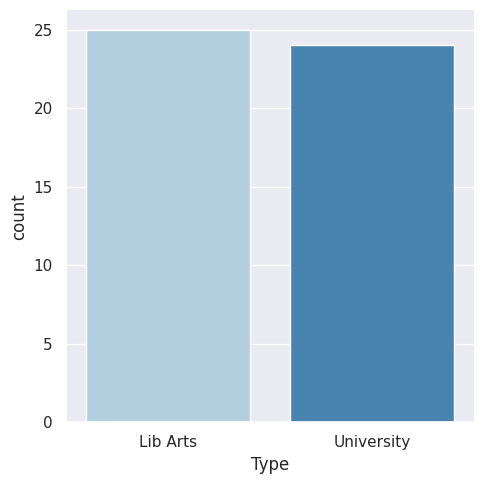

In [ ]:
# Set the figure size
plt.figure(figsize=(6,8))

# Create a column chart for "Gender"
sns.catplot(data=df, x='Type', palette="Blues",
            hue="Type", kind="count")

# show the plot
plt.show()

In [ ]:
df.head()


,School,Type,SAT,AcceptanceRate,ExpenditurePerStudent,Top10HS,GraduationRate
0,Amherst,Lib Arts,1315,0.22,26636,85,93
1,Barnard,Lib Arts,1220,0.53,17653,69,80
2,Bates,Lib Arts,1240,0.36,17554,58,88
3,Berkeley,University,1176,0.37,23665,95,68
4,Bowdoin,Lib Arts,1300,0.24,25703,78,90


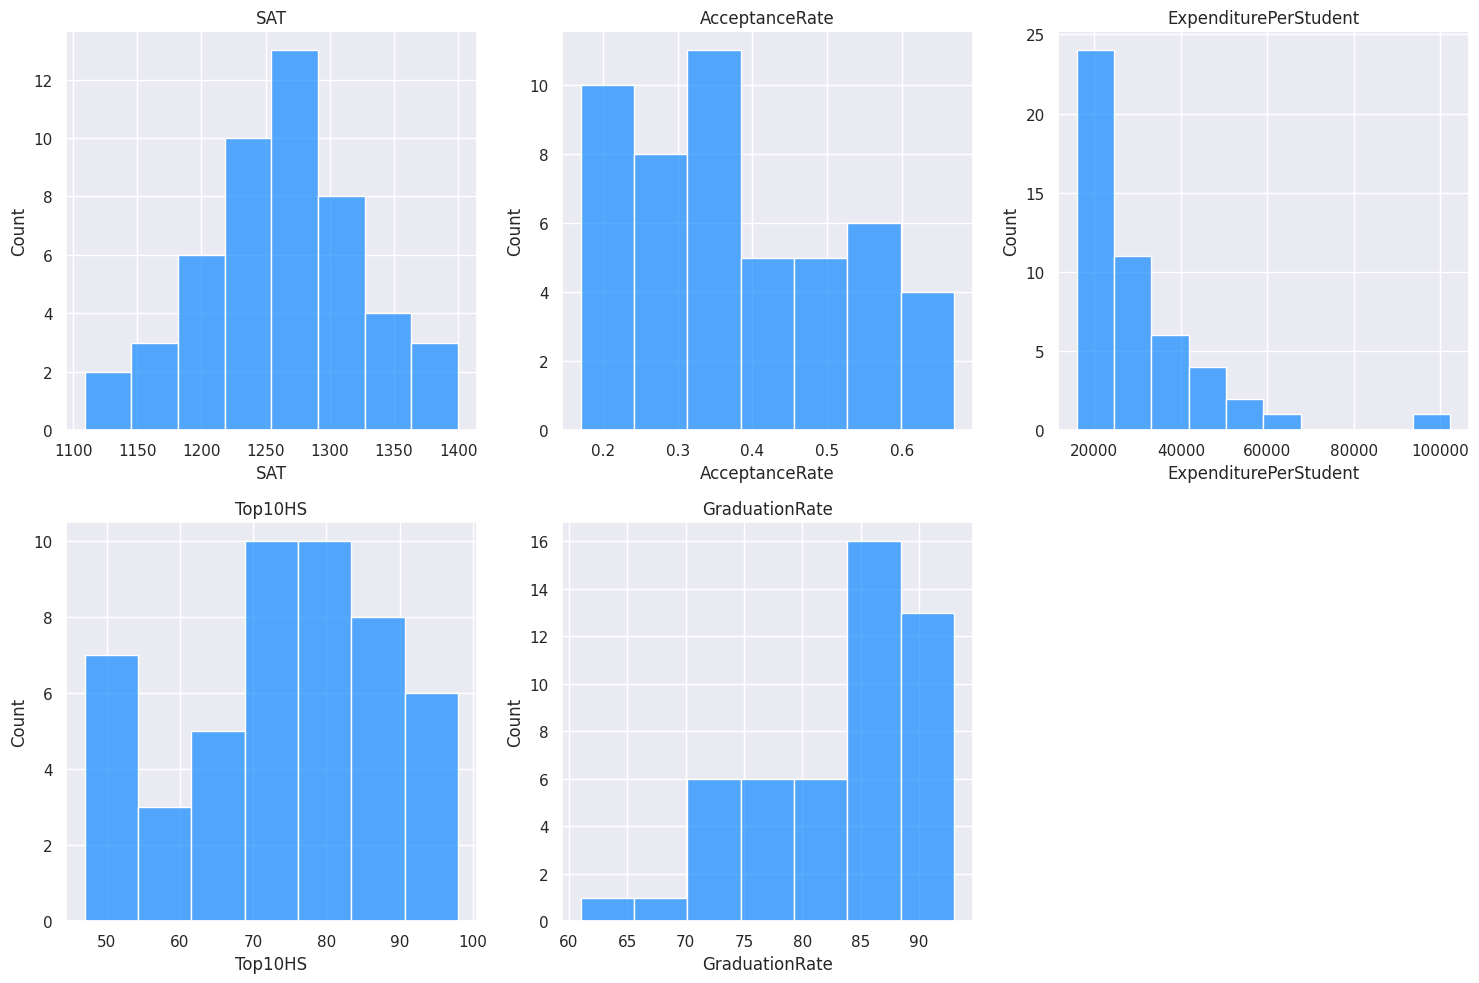

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Columns to plot
num_col = ['SAT', 'AcceptanceRate', 'ExpenditurePerStudent', 'Top10HS', "GraduationRate"]

# Create histograms
for i, col in enumerate(num_col):
    sns.histplot(data=df, x=col, color='dodgerblue', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')

# Remove the unused subplot (since 2x3 = 6 plots, but you have only 5)
if len(num_col) < len(axes):
    for j in range(len(num_col), len(axes)):
        fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

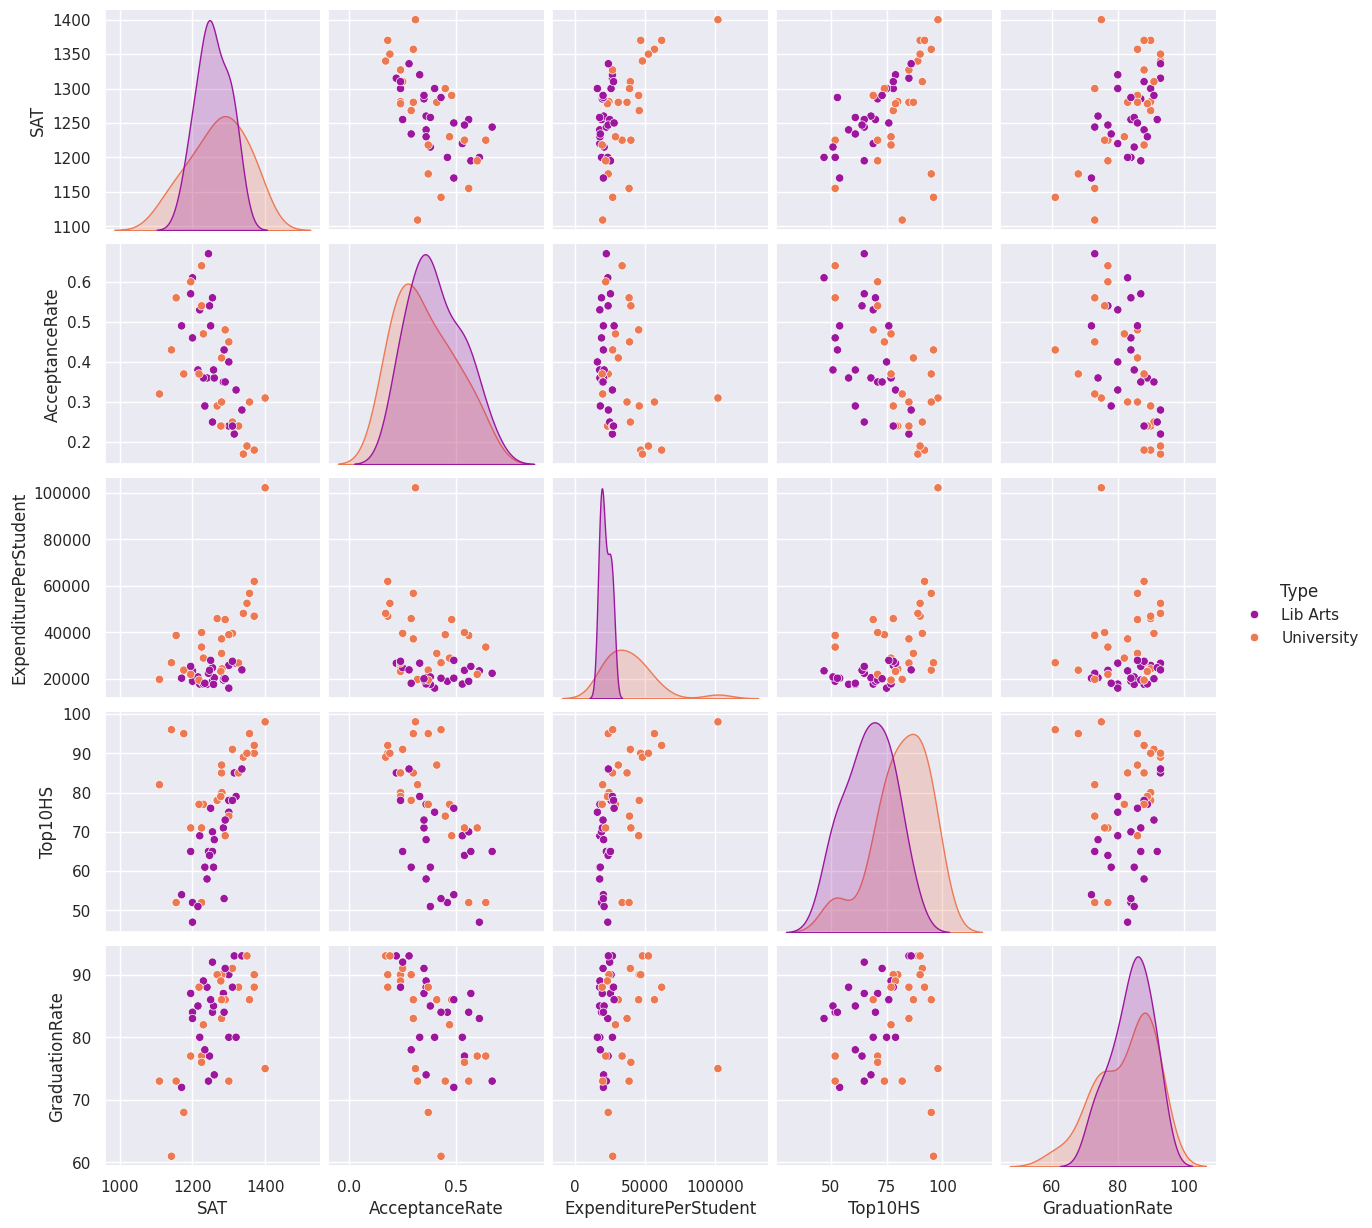

In [ ]:
pair_plot = sns.pairplot(df[['SAT', 'AcceptanceRate',
                             'ExpenditurePerStudent',
                             'Top10HS', 'GraduationRate',
                             'Type']],
                         hue='Type', diag_kind='kde',
                         palette='plasma')

In [ ]:
df.head()

,School,Type,SAT,AcceptanceRate,ExpenditurePerStudent,Top10HS,GraduationRate
0,Amherst,Lib Arts,1315,0.22,26636,85,93
1,Barnard,Lib Arts,1220,0.53,17653,69,80
2,Bates,Lib Arts,1240,0.36,17554,58,88
3,Berkeley,University,1176,0.37,23665,95,68
4,Bowdoin,Lib Arts,1300,0.24,25703,78,90


<Axes: >

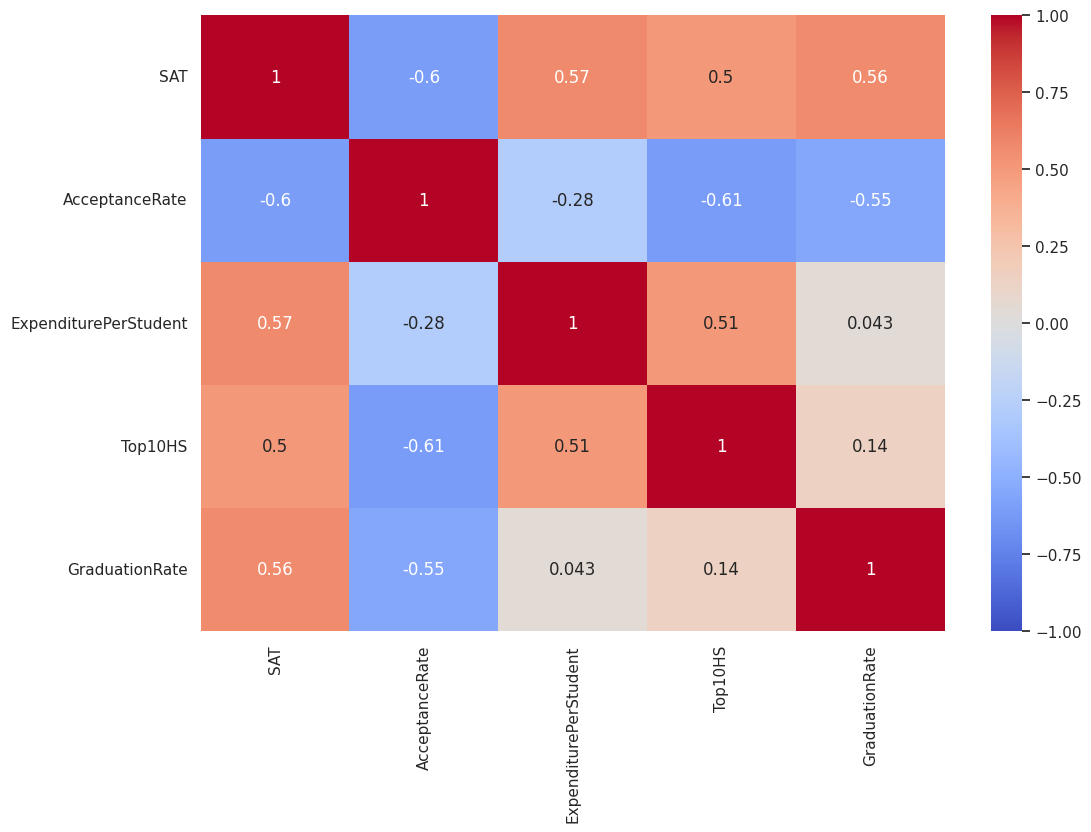

In [ ]:
# Select columns for correlation analysis
cols_cor = ['SAT','AcceptanceRate', 'ExpenditurePerStudent',
            'Top10HS','GraduationRate']

# Compute correlation matrix
correlation_matrix = df[cols_cor].corr()

plt.figure(figsize=(12, 8))

# Display correlation matrix in a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform
type_encoded = encoder.fit_transform(df[['Type']])

# Create column names
col_names = encoder.get_feature_names_out(['Type'])

# Add back to the dataframe
df[col_names] = type_encoded.astype(int)

In [ ]:
df.head()

,School,Type,SAT,AcceptanceRate,ExpenditurePerStudent,Top10HS,GraduationRate,Type_University
0,Amherst,Lib Arts,1315,0.22,26636,85,93,0
1,Barnard,Lib Arts,1220,0.53,17653,69,80,0
2,Bates,Lib Arts,1240,0.36,17554,58,88,0
3,Berkeley,University,1176,0.37,23665,95,68,1
4,Bowdoin,Lib Arts,1300,0.24,25703,78,90,0


# Model Development

## First Model

In [ ]:
cols = ["SAT", "AcceptanceRate", "ExpenditurePerStudent", "Top10HS", "Type_University"]

X = sm.add_constant(df[cols])
y = df["GraduationRate"]

model = sm.OLS(y, X).fit()

print(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:         GraduationRate   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     10.05
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           2.02e-06
Time:                        03:32:58   Log-Likelihood:                -148.45
No. Observations:                  49   AIC:                             308.9
Df Residuals:                      43   BIC:                             320.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.59

The p_value of "Type_University" is greater than 0.05, hence this predictor is not statistically significant. Therefore, we remove it and rebuild the model

## Second Model

In [ ]:
cols = ["SAT", "AcceptanceRate", "ExpenditurePerStudent", "Top10HS"]

X = sm.add_constant(df[cols])
y = df["GraduationRate"]

model = sm.OLS(y, X).fit()

print(model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:         GraduationRate   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     12.63
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           6.33e-07
Time:                        03:32:58   Log-Likelihood:                -148.69
No. Observations:                  49   AIC:                             307.4
Df Residuals:                      44   BIC:                             316.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    17.92

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

                Variable          VIF
0                  const  1048.666648
1                    SAT     2.164223
2         AcceptanceRate     2.105911
3  ExpenditurePerStudent     1.770573
4                Top10HS     1.969190


(1) **Coefficients on the variables**. The estimated coefficients are specified in the second table. Our model is thus described by the line:

$GraduationRate = 17.921 + 0.072*SAT - 24.859*AcceptanceRate - 0.0001*ExpenditurePerStudent - 0.162*Top10HS + e$.

Considering the signs on the coefficients we can state that the graduation rate is positively affected by the average SAT score (the greater the average SAT score, the more likely the graduation ate to be higher) and negatively affected by the other variables (for example, the greater the acceptance rate, the lower the graduate rate).

(2) **Significance of the variables**. The p-values on all the coefficients, except the intercept, indicate that the variables are significant, i.e., the factors do have a significant effect on the graduation rate.

(3) **Quality of the model**. The $R^2$ and the adjusted $R^2$ values have gone up from the 0.3 rate of the simple linear regression to around 0.5. This indicates that the addition of extra independent variables has helped to improve the model.

In [ ]:
y_pred = model.predict(X)

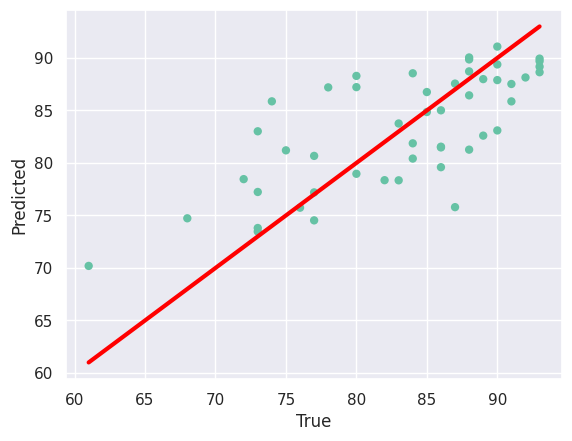

In [ ]:
fig,ax = plt.subplots()
ax.scatter(df["GraduationRate"], y_pred, edgecolors="None")
ax.plot([df["GraduationRate"].min(), df["GraduationRate"].max()],[df["GraduationRate"].min(), df["GraduationRate"].max()],'r',lw=3)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
plt.show()

# Assumptions

## 1. Zero mean of residuals

In [ ]:
# Step 1: Extract residuals
residuals = model.resid

# Step 2: Compute mean of residuals
mean_residual = residuals.mean()

# Step 3: Print result
print(f"Mean of residuals: {mean_residual:.6f}")

Mean of residuals: -0.000000


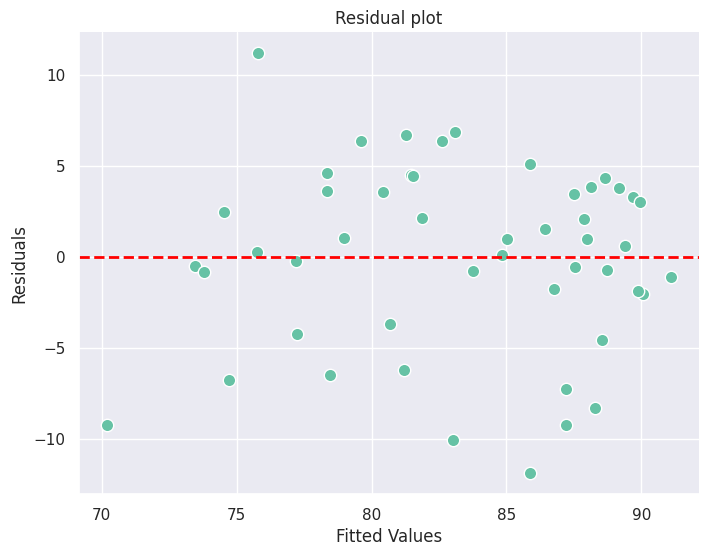

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(), y=model.resid, alpha=1.0, s=80,linewidth=1)
sns.despine()
plt.axhline(0, color='red', linestyle='--',linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

## 2. Normality of Residuals

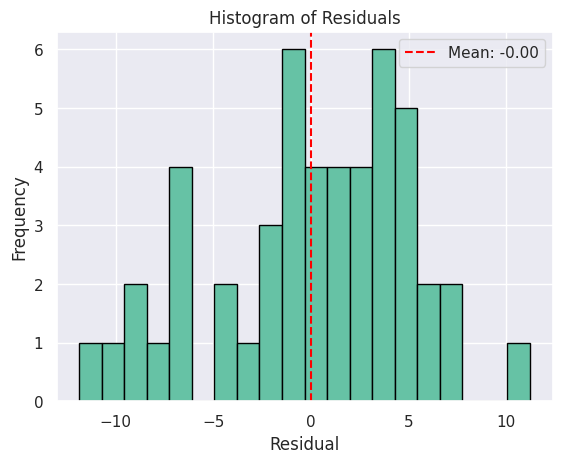

In [ ]:
residuals = model.resid

plt.hist(residuals, bins=20, edgecolor='black')
plt.axvline(residuals.mean(), color='red', linestyle='--', label=f"Mean: {residuals.mean():.2f}")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


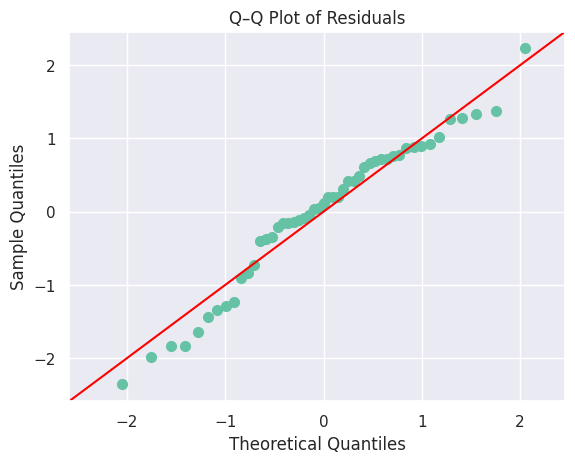

In [ ]:
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca(),
          markersize=7, color='dodgerblue', alpha=1.0)
plt.title("Q–Q Plot of Residuals")
plt.show()

As with the simple regression model, we can plot the standardized residuals and their histogram to confirm that the assumptions of normality of the distribution of residuals and of the zero mean of residuals are valid with this model.

The scatterplot and the histogram suggest the residuals are equally distributed around 0 and are normally distributed. The results of the Jarque-Bera test on the residuals (the third table of the summary) also indicate that the errors are distributed normally: the p-value equals 0.4, therefore we cannot reject the null hypothesis of normal distribution.

As with the simple linear regression model, we do not test for independence of the errors and for homoskedasticity, as these assumptions are likely to be violated only if the observations are ordered along a temporal dimension.

Thus, the addition of the extra variables not only improved the quality of the model, but also ensured that the assumptions of the classical linear regression method hold with the model.

## 3. Constant Error Variance

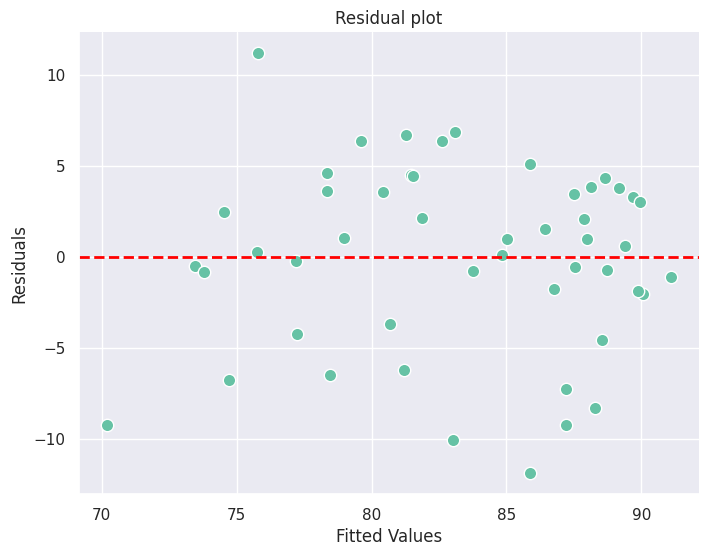

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(), y=model.resid, alpha=1.0, s=80,linewidth=1)
sns.despine()
plt.axhline(0, color='red', linestyle='--',linewidth=2)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

## 4. Independence of the errors

In [ ]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(model.resid)
print(f"Durbin–Watson statistic: {dw_stat:.4f}")

Durbin–Watson statistic: 2.0098


This value is very close to 2.0, and well within the safe range (1.5–2.5). The residuals in the regression model appear to be independent — there is no evidence of autocorrelation.

# **Citing This Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Principles of Data Analytics. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-315---Principles-of-Data-Analytics/tree/main